# Tax Fraud Detection 
Zindi Competition

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.feature_selection import RFE
from statsmodels import api as sm

In [15]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

In [16]:
train.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,49,14185,P,99,1,6101,4,2,2,2,...,13.575957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id0
1,221,6032,P,99,0,6271,8,2,1,1,...,11.692894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id1
2,181,8907,P,99,0,6102,4,2,2,2,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id2
3,252,5783,M,22,0,4403,4,2,2,2,...,16.237871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id3
4,234,1477,P,99,0,6312,8,2,2,1,...,13.399983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id4


In [17]:
test.tail()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,RES_ANNIMP,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
10733,222,11133,C,99,0,5714,4,2,2,2,...,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id10733
10734,500,11889,M,22,0,3701,4,2,2,2,...,2013,162000.0,0.0,0.0,29160.0,NaN,NaN,NaN,NaN,test_id10734
10735,197,6877,M,22,0,4115,4,2,2,2,...,2015,41859827.0,0.0,0.0,7305959.0,NaN,NaN,NaN,NaN,test_id10735
10736,192,2408,M,22,0,2601,4,2,2,2,...,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id10736
10737,122,9394,P,99,0,6208,4,2,2,2,...,2015,NaN,NaN,NaN,NaN,7665324.0,0.0,0.0,1379760.0,test_id10737


In [18]:
train.isnull().sum()

BCT_CODBUR          0
CTR_MATFIS          0
CTR_CATEGO_X        0
FJU_CODFJU          0
CTR_CESSAT          0
ACT_CODACT          0
CTR_OBLDIR          0
CTR_OBLACP          0
CTR_OBLRES          0
CTR_OBLFOP          0
CTR_OBLTFP          0
CTR_OBLDCO          0
CTR_OBLTVA          0
CTR_OFODEC         10
CTR_OFODEP         10
CTR_OFODET         10
CTR_OBLAUT         10
CTR_OBLASS         10
CTR_ODTIMB         10
CTR_OBLTCL          0
CTR_OBLTHO         10
CTR_OBLDLI         10
CTR_OBLTVI         10
CTR_RATISS          0
EXE_EXERCI          0
TVA_CHAFF6       1974
TVA_CHAFF7       1974
TVA_CHAF10       1974
TVA_CHAF12       1974
TVA_CAF125       1974
                ...  
SND_MNTPRD_E    23610
SND_MNTTVA_E    23610
SND_MNTDRC_E    23610
SND_MNTAVA_E    23610
SND_MNTTAX_E    23610
SND_MNTPAY_E    23610
SND_MNTAIR_E    23610
SND_MNTPRD_A    21631
SND_MNTTVA_A    21631
SND_MNTDRC_A    21631
SND_MNTAVA_A    21631
SND_MNTTAX_A    21631
SND_MNTPAY_A    21631
SND_MNTAIR_A    21631
AX1_BRTIMP

In [19]:
test.isnull().sum()

BCT_CODBUR          0
CTR_MATFIS          0
CTR_CATEGO_X        0
FJU_CODFJU          0
CTR_CESSAT          0
ACT_CODACT          0
CTR_OBLDIR          0
CTR_OBLACP          0
CTR_OBLRES          0
CTR_OBLFOP          0
CTR_OBLTFP          0
CTR_OBLDCO          0
CTR_OBLTVA          0
CTR_OFODEC          4
CTR_OFODEP          4
CTR_OFODET          4
CTR_OBLAUT          4
CTR_OBLASS          4
CTR_ODTIMB          4
CTR_OBLTCL          0
CTR_OBLTHO          4
CTR_OBLDLI          4
CTR_OBLTVI          4
CTR_RATISS          0
EXE_EXERCI          0
TVA_CHAFF6        808
TVA_CHAFF7        808
TVA_CHAF10        808
TVA_CHAF12        808
TVA_CAF125        808
                ...  
SND_MNTAIR_I     8859
SND_MNTPRD_E    10120
SND_MNTTVA_E    10120
SND_MNTDRC_E    10120
SND_MNTAVA_E    10120
SND_MNTTAX_E    10120
SND_MNTPAY_E    10120
SND_MNTAIR_E    10120
SND_MNTPRD_A     9300
SND_MNTTVA_A     9300
SND_MNTDRC_A     9300
SND_MNTAVA_A     9300
SND_MNTTAX_A     9300
SND_MNTPAY_A     9300
SND_MNTAIR

In [21]:
## Fill the missing values 
train.fillna(value=0, axis=1, inplace=True)
test.fillna(value=0, axis=1, inplace=True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25053 entries, 0 to 25052
Columns: 121 entries, BCT_CODBUR to id
dtypes: float64(103), int64(16), object(2)
memory usage: 23.1+ MB


In [24]:
train.describe()

,BCT_CODBUR,CTR_MATFIS,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,...,RES_ANNIMP,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
count,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.00000,...,25053.000000,25053.000000,2.505300e+04,2.505300e+04,2.505300e+04,2.505300e+04,2.505300e+04,2.505300e+04,2.505300e+04,2.505300e+04
mean,214.937453,7791.431326,59.582685,0.048697,4818.192791,4.451483,1.960444,1.977049,1.927913,1.94827,...,2014.503533,11.803844,7.140211e+08,5.063574e+05,2.033551e+04,3.978775e+07,9.710352e+07,2.617772e+05,2.896803e+03,1.616035e+07
std,163.089484,4494.622188,38.541612,0.228200,1168.145804,1.203677,0.194918,0.154475,0.263075,0.22346,...,1.329887,7.078453,3.509183e+10,5.640084e+07,1.802397e+06,1.319015e+09,2.076534e+09,1.699078e+07,2.090431e+05,3.682843e+08
min,9.000000,1.000000,10.000000,0.000000,1002.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,2013.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,92.000000,3923.000000,22.000000,0.000000,4203.000000,4.000000,2.000000,2.000000,2.000000,2.00000,...,2013.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,182.000000,7822.000000,23.000000,0.000000,4417.000000,4.000000,2.000000,2.000000,2.000000,2.00000,...,2014.000000,14.989208,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,254.000000,11703.000000,99.000000,0.000000,6102.000000,4.000000,2.000000,2.000000,2.000000,2.00000,...,2015.000000,16.633323,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,700.000000,15603.000000,99.000000,2.000000,8999.000000,9.000000,2.000000,5.000000,5.000000,3.00000,...,2018.000000,24.067398,3.414507e+12,8.897885e+09,1.750689e+08,1.608777e+11,2.445480e+11,2.438877e+09,2.614500e+07,4.421998e+10


In [27]:
train_corr = train.corr()

In [37]:
train.dtypes == 'object'

BCT_CODBUR      False
CTR_MATFIS      False
CTR_CATEGO_X     True
FJU_CODFJU      False
CTR_CESSAT      False
ACT_CODACT      False
CTR_OBLDIR      False
CTR_OBLACP      False
CTR_OBLRES      False
CTR_OBLFOP      False
CTR_OBLTFP      False
CTR_OBLDCO      False
CTR_OBLTVA      False
CTR_OFODEC      False
CTR_OFODEP      False
CTR_OFODET      False
CTR_OBLAUT      False
CTR_OBLASS      False
CTR_ODTIMB      False
CTR_OBLTCL      False
CTR_OBLTHO      False
CTR_OBLDLI      False
CTR_OBLTVI      False
CTR_RATISS      False
EXE_EXERCI      False
TVA_CHAFF6      False
TVA_CHAFF7      False
TVA_CHAF10      False
TVA_CHAF12      False
TVA_CAF125      False
                ...  
SND_MNTPRD_E    False
SND_MNTTVA_E    False
SND_MNTDRC_E    False
SND_MNTAVA_E    False
SND_MNTTAX_E    False
SND_MNTPAY_E    False
SND_MNTAIR_E    False
SND_MNTPRD_A    False
SND_MNTTVA_A    False
SND_MNTDRC_A    False
SND_MNTAVA_A    False
SND_MNTTAX_A    False
SND_MNTPAY_A    False
SND_MNTAIR_A    False
AX1_BRTIMP

In [39]:
train['CTR_CATEGO_X'].unique()

array(['P', 'M', 'C', 'N'], dtype=object)

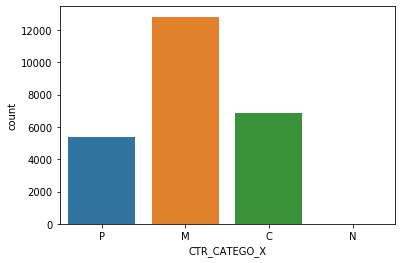

In [40]:
sns.countplot(x='CTR_CATEGO_X', data=train)

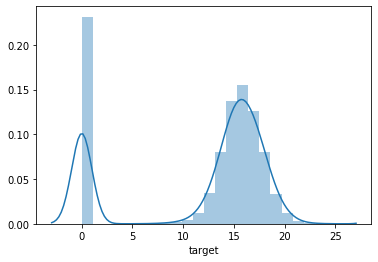

In [42]:
sns.distplot(train['target'])

In [44]:
px.histogram(train, x='target',color='CTR_CATEGO_X')

In [47]:
# Because the feature selection does not take categorical variables
train = pd.get_dummies(train, columns=['CTR_CATEGO_X'])

In [61]:
test = pd.get_dummies(test, columns=['CTR_CATEGO_X'])

In [69]:
train.drop('CTR_CATEGO_X_N', axis=1, inplace=True)

In [64]:
test.tail()

,BCT_CODBUR,CTR_MATFIS,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,...,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id,CTR_CATEGO_X_C,CTR_CATEGO_X_M,CTR_CATEGO_X_P
10733,222,11133,99,0,5714,4,2,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,test_id10733,1,0,0
10734,500,11889,22,0,3701,4,2,2,2,2,...,0.0,29160.0,0.0,0.0,0.0,0.0,test_id10734,0,1,0
10735,197,6877,22,0,4115,4,2,2,2,2,...,0.0,7305959.0,0.0,0.0,0.0,0.0,test_id10735,0,1,0
10736,192,2408,22,0,2601,4,2,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,test_id10736,0,1,0
10737,122,9394,99,0,6208,4,2,2,2,2,...,0.0,0.0,7665324.0,0.0,0.0,1379760.0,test_id10737,0,0,1


# Feature Engineering

In [51]:
X = train.drop(['target','id'], axis=1)
y= train['target']

In [52]:
#Wrapper Method - Backward Elimination 
cols = list(X.columns)
pmax = 1

while(len(cols)>0):
    p=[]
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    p= pd.Series(model.pvalues.values[1:], index=cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()

    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break


selected_features_BE = cols
print('Original Features:')
print(X.columns.values)
print('Selected Features: ')
print(selected_features_BE)

C:\Users\Gloria\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

Original Features:
['BCT_CODBUR' 'CTR_MATFIS' 'FJU_CODFJU' 'CTR_CESSAT' 'ACT_CODACT'
 'CTR_OBLDIR' 'CTR_OBLACP' 'CTR_OBLRES' 'CTR_OBLFOP' 'CTR_OBLTFP'
 'CTR_OBLDCO' 'CTR_OBLTVA' 'CTR_OFODEC' 'CTR_OFODEP' 'CTR_OFODET'
 'CTR_OBLAUT' 'CTR_OBLASS' 'CTR_ODTIMB' 'CTR_OBLTCL' 'CTR_OBLTHO'
 'CTR_OBLDLI' 'CTR_OBLTVI' 'CTR_RATISS' 'EXE_EXERCI' 'TVA_CHAFF6'
 'TVA_CHAFF7' 'TVA_CHAF10' 'TVA_CHAF12' 'TVA_CAF125' 'TVA_CHAF15'
 'TVA_CHAF18' 'TVA_CHAF22' 'TVA_CHAF29' 'TVA_CHAF36' 'TVA_TOTDUE'
 'TVA_MOIDEB' 'TVA_CRDINI' 'TVA_BASIMB' 'TVA_DEDIMB' 'TVA_BASEQL'
 'TVA_DEDEQL' 'TVA_BASEQI' 'TVA_DEDEQI' 'TVA_BASAUL' 'TVA_DEDAUL'
 'TVA_BASAUI' 'TVA_DEDAUI' 'TVA_BASRSM' 'TVA_DEDRSM' 'TVA_RSNRES'
 'TVA_TRSPOR' 'TVA_DEDREG' 'TVA_RESTIT' 'TVA_MNTPAY' 'TVA_MOIFIN'
 'TVA_CRDFIN' 'TVA_ACHSUS' 'TVA_ACHEXO' 'TVA_ACHNDD' 'TVA_CAFEXP'
 'TVA

## Recursive Feature Elimination

In [54]:
# Recursive Feature Elimination
#It will rank featues according to importance after recursively removing attributes
model1 = GradientBoostingRegressor()
rfe = RFE(model1,10)
X_rfe = rfe.fit_transform(X,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False  True
 False False False False  True  True False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False  True False False False False False False False False False
 False False]
[  1  21   1   3   1  59  36  61  30  69  71  18  76  73  65  88  63  28
  75  51   8  70  92  35   9  39  77  22 100  79  13  53 108 110   1  27
  12  96  58  55 104  57  37   2  25  49  45   1  23  89  81  56   1   1
   5   1  93 101 103  52   4  43  80 

## Model Building

In [57]:
# Base-line Model
mean_target = train['target'].mean().round(0)
#Submission DataFrame

base_1 = test[['id']]
base_1['target'] = mean_target

#Export Submission File
base_1.to_csv('submission1.csv', index=False)

In [58]:
train2 = train[['BCT_CODBUR', 'CTR_CESSAT', 'CTR_OBLDIR', 'CTR_OBLACP', 'CTR_OFODEP', 'CTR_OFODET', 'CTR_OBLASS', 'CTR_OBLTHO', 'CTR_OBLDLI', 'CTR_RATISS', 'TVA_CHAFF6', 'TVA_CHAFF7', 'TVA_CHAF12', 'TVA_CHAF18', 'TVA_CHAF22', 'TVA_TOTDUE', 'TVA_MOIDEB', 'TVA_DEDEQL', 'TVA_DEDEQI', 'TVA_DEDAUL', 'TVA_BASRSM', 'TVA_DEDRSM', 'TVA_TRSPOR', 'TVA_RESTIT', 'TVA_MOIFIN', 'TVA_CRDFIN', 'TVA_CAFSUS', 'TVA_CAFEXO', 'TVA_CRDRMP', 'TVA_MTORDTVA', 'TVA_MTDJRTVA', 'TVA_CA132018', 'TVA_CA192018', 'ADB_MNTORD', 'SND_MNTDRC_I', 'SND_MNTPAY_I', 'SND_MNTPRD_E', 'SND_MNTPAY_A', 'SND_MNTAIR_A', 'AX1_BRTIMP', 'FAC_MNTPRI_F', 'FAC_MNTPRI_C', 'FAC_MNTTVA_C', 'CTR_CATEGO_X_M', 'CTR_CATEGO_X_N']]

In [65]:
test2 = test[['BCT_CODBUR', 'CTR_CESSAT', 'CTR_OBLDIR', 'CTR_OBLACP', 'CTR_OFODEP', 'CTR_OFODET', 'CTR_OBLASS', 'CTR_OBLTHO', 'CTR_OBLDLI', 'CTR_RATISS', 'TVA_CHAFF6', 'TVA_CHAFF7', 'TVA_CHAF12', 'TVA_CHAF18', 'TVA_CHAF22', 'TVA_TOTDUE', 'TVA_MOIDEB', 'TVA_DEDEQL', 'TVA_DEDEQI', 'TVA_DEDAUL', 'TVA_BASRSM', 'TVA_DEDRSM', 'TVA_TRSPOR', 'TVA_RESTIT', 'TVA_MOIFIN', 'TVA_CRDFIN', 'TVA_CAFSUS', 'TVA_CAFEXO', 'TVA_CRDRMP', 'TVA_MTORDTVA', 'TVA_MTDJRTVA', 'TVA_CA132018', 'TVA_CA192018', 'ADB_MNTORD', 'SND_MNTDRC_I', 'SND_MNTPAY_I', 'SND_MNTPRD_E', 'SND_MNTPAY_A', 'SND_MNTAIR_A', 'AX1_BRTIMP', 'FAC_MNTPRI_F', 'FAC_MNTPRI_C', 'FAC_MNTTVA_C', 'CTR_CATEGO_X_M']]

In [91]:
target = 'target'
IDCol = ['id']

def modelfit(algorithm, dtrain, dtest, predictors, target, IDCol, filename):
    #Fit the algorithm on the data set
    algorithm.fit(dtrain[predictors], dtrain[target])

    #Predict training set
    dtrain_predictions = algorithm.predict(dtrain[predictors])

    #Perform cross-validation
    #cv_score = cross_val_score(algorithm, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')     
    #cv_score = np.sqrt(np.abs(cv_score))

    #Print model Report
    print ('\nModel Report')
    print ('RMSE : %.3g' % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    #print ("CV Score: Mean - %.4g | Std - %.4g' | Min - %.4g | Max - %.4g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
    #print(metrics.mean_squared_error(y2_test, dtrain_predictions))
    print(metrics.r2_score(dtrain[target].values,dtrain_predictions))
    #print(metrics.classification_report(dtrain[target].values, dtrain_predictions))
    #print(metrics.roc_auc_score(dtrain[target].values, dtrain_predictions))
    #print(metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    
    #Predict on testing data
    dtest[target] = algorithm.predict(dtest[predictors])

    #Export submission file
    IDCol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDCol})
    submission.to_csv(filename, index=False)

In [84]:
predictors = [x for x in train.columns if x not in [target]+IDCol]


In [92]:
linearAlg = LinearRegression(normalize=True)
modelfit(linearAlg, train, test, predictors, target, IDCol, 'linearRegSubmission.csv')


Model Report
RMSE : 6.89
0.053583958409048726


In [93]:
gradBoAlg = GradientBoostingRegressor(n_estimators=200, max_depth=10, min_samples_leaf=150)
modelfit(gradBoAlg, train, test, predictors, target, IDCol, 'gradBoSubmission.csv')


Model Report
RMSE : 5.06
0.48897340460026484


In [94]:
decTreeAlg = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(decTreeAlg, train, test, predictors, target, IDCol, 'decTreeSubmission.csv')


Model Report
RMSE : 5.98
0.2854962418571354


In [95]:
lassAlg = Lasso()
modelfit(lassAlg, train, test, predictors, target, IDCol, 'lassoSubmission.csv')


Model Report
RMSE : 6.89
0.05136593058243766
C:\Users\Gloria\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 595855.695173333, tolerance: 125.52180057225048

